In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


sshfs -o ro beluga:/scratch/dlatorne/21nov-11x33r2 beluga  
fusermount -u beluga/

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

In [3]:
imin, imax = 350, 600
jmin, jmax = 150, 350

In [4]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale):
    green = np.array(ng.variables[variable][-1])
    hind = np.array(hd.variables[variable][-1])

    colors = axs[0, 0].pcolormesh(green[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 0], extend='both')

    colors = axs[0, 1].pcolormesh(hind[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 1], extend='both')

    colors = axs[0, 2].pcolormesh(hind[0, imin:imax, jmin:jmax] - green[0, imin:imax, jmin:jmax], cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[0, 2], extend='both')

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
  
    for i in range(1, 3):
        cbar = vis.contour_thalweg(axs[i, 0], green, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 1], hind, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 2], hind-green, bathy, mesh, np.arange(-scale, 1.05*scale, 0.1*scale), cmap='bwr')
    for ax in [axs[2, 0], axs[2, 1], axs[2, 2]]:
        ax.set_ylim((20, 0))
        ax.set_xlim((300, 500))
        
    axs[0,0].set_title('Base (Hindcast 201812)')
    axs[0,1].set_title('Optimum')
    axs[0,2].set_title('Optimum - Hindcast')

# Physics

In [6]:
ng = xr.open_dataset('/results/SalishSea/spinup.201812/21nov14/SalishSea_1h_20141121_20141121_grid_T.nc')
hd = xr.open_dataset('/home/sallen/MEOPAR/beluga/SalishSea_1h_20141121_20141121_grid_T_20141121-20141121.nc')

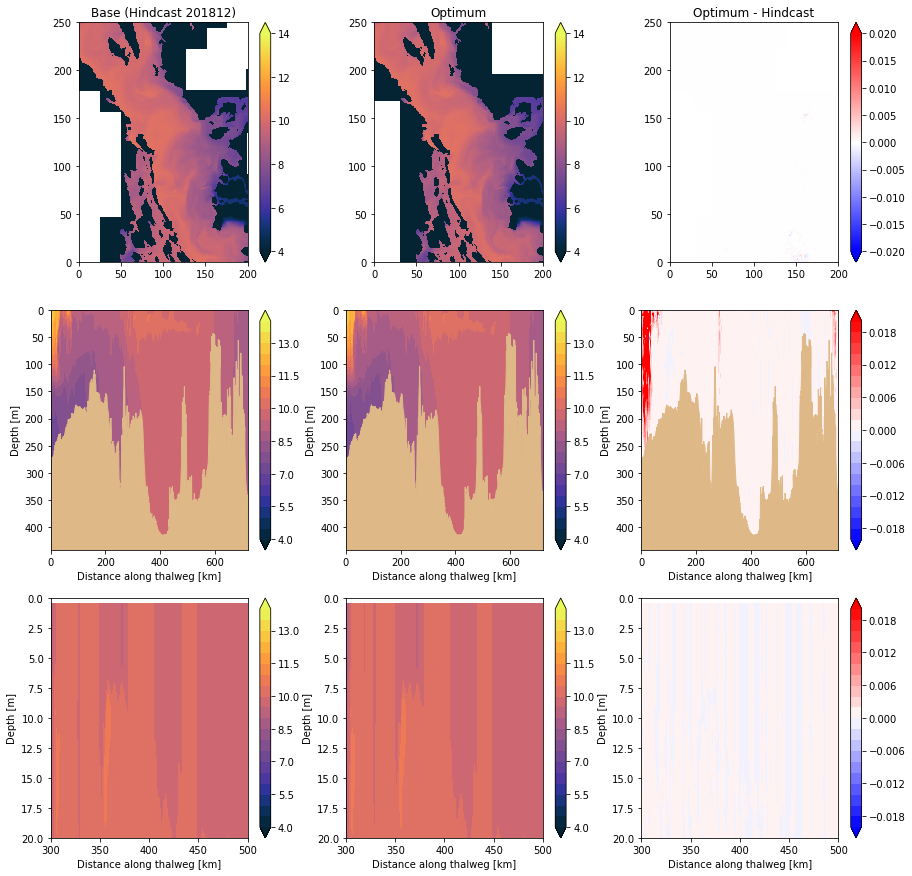

In [7]:
variable, name, cmap = 'votemper', 10, cm.thermal
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 14, 4, 0.02)

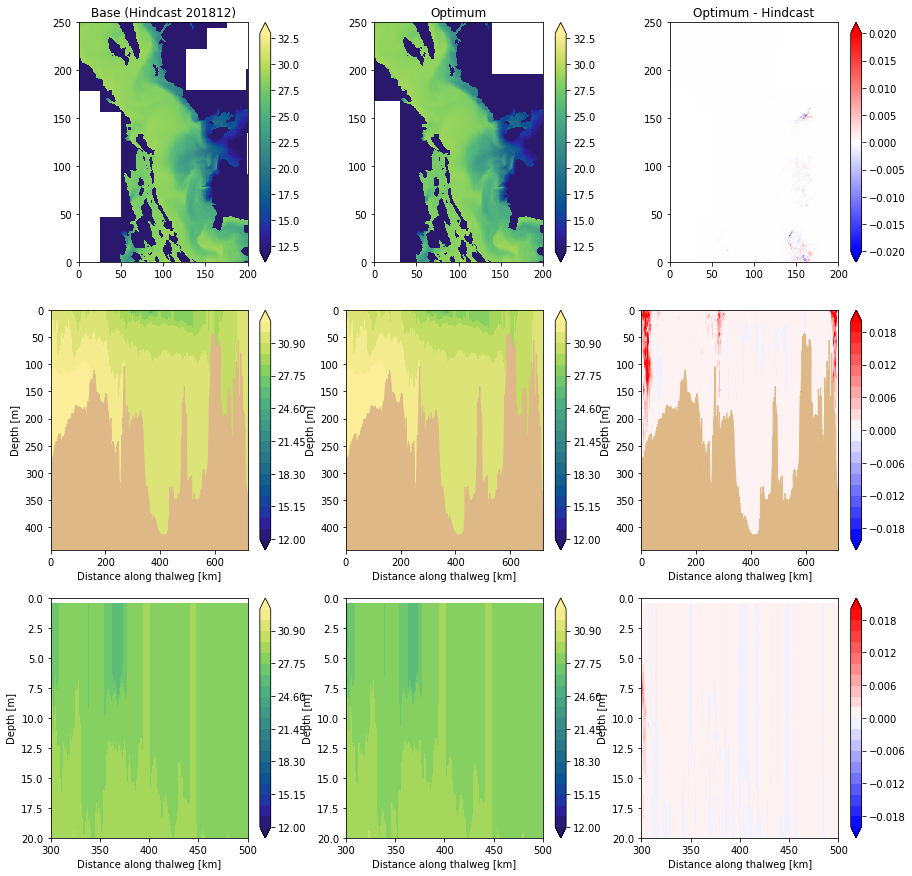

In [8]:
variable, name, cmap = 'vosaline', 'salinity', cm.haline
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 33, 12, 0.02)

# Biology

In [10]:
ng = xr.open_dataset('/results/SalishSea/spinup.201812/21nov14/SalishSea_1h_20141121_20141121_ptrc_T.nc')
hd = xr.open_dataset('/home/sallen/MEOPAR/beluga/SalishSea_1h_20141121_20141121_ptrc_T_20141121-20141121.nc')

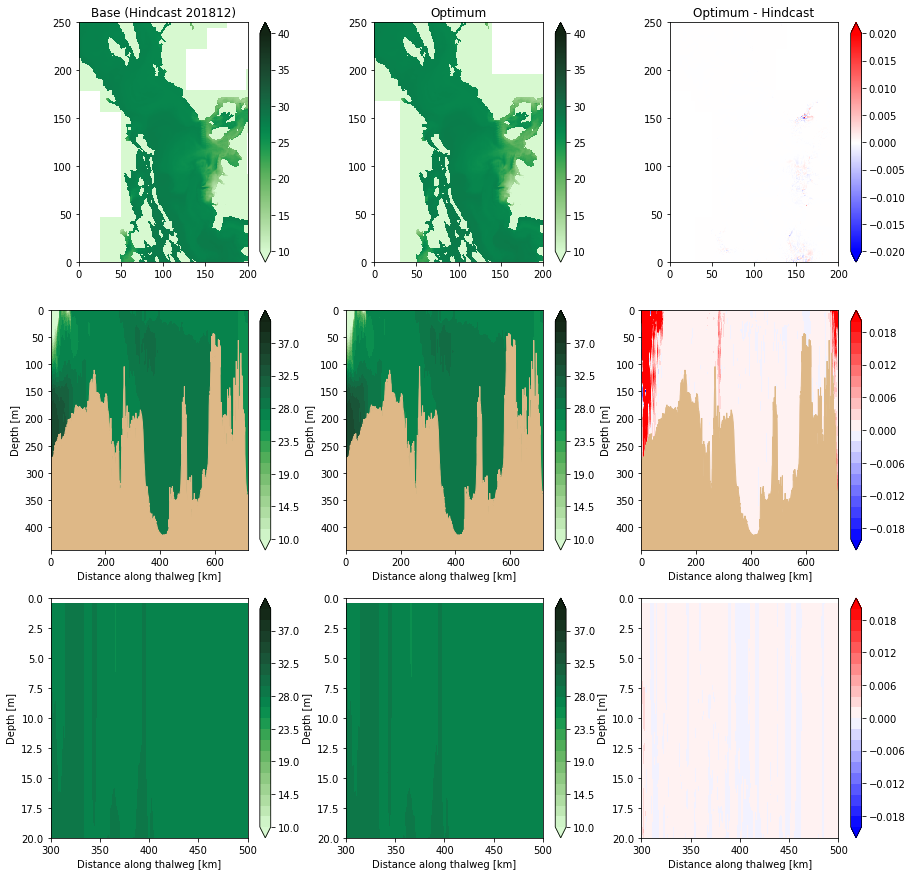

In [11]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 40, 10, 0.02)

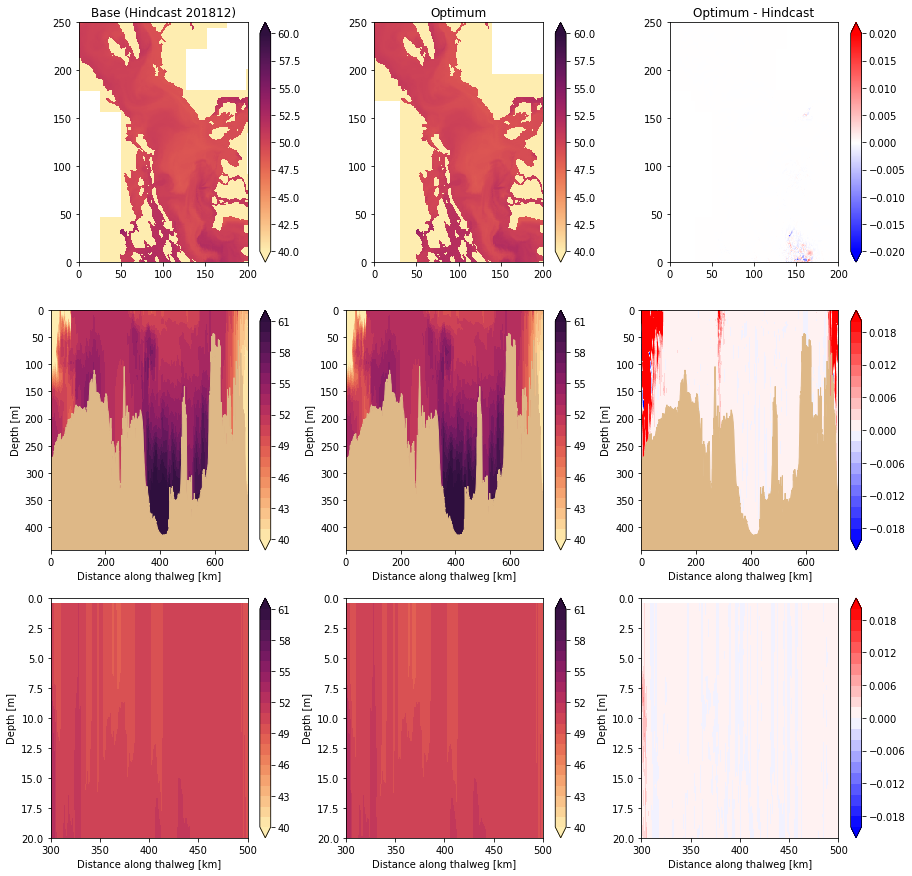

In [12]:
variable, name, cmap = 'silicon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 60, 40,0.02)

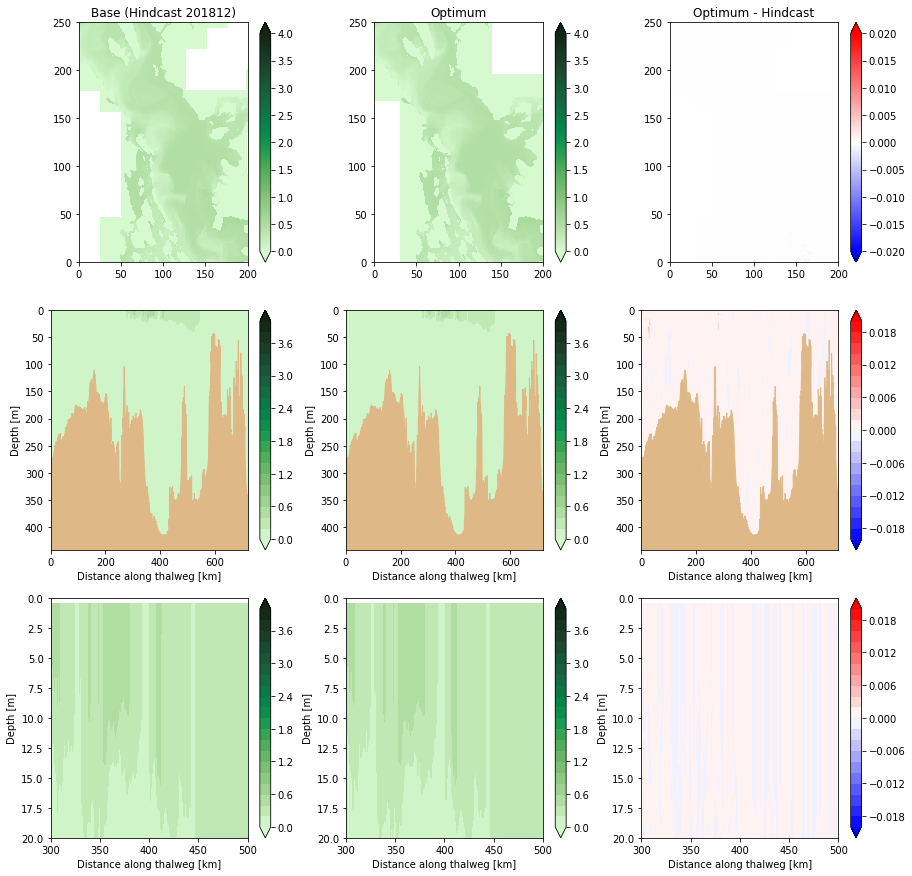

In [13]:
variable, name, cmap = 'diatoms', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 4, 0, 0.02)

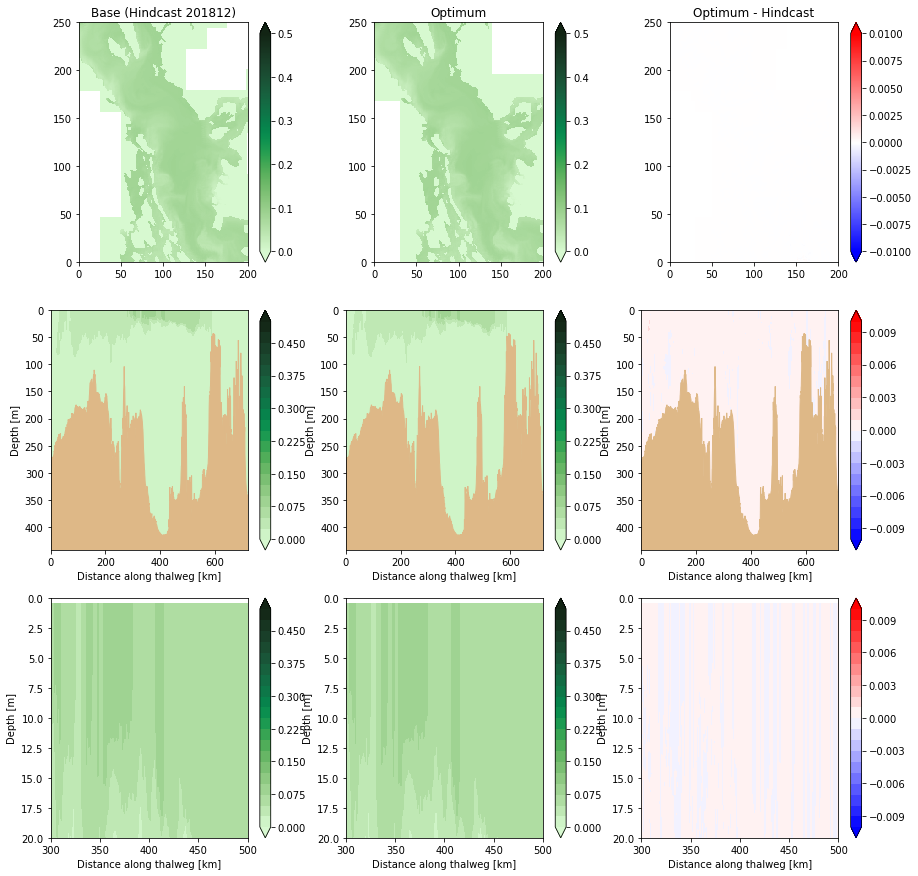

In [14]:
variable, name, cmap = 'flagellates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.5, 0, 0.01)

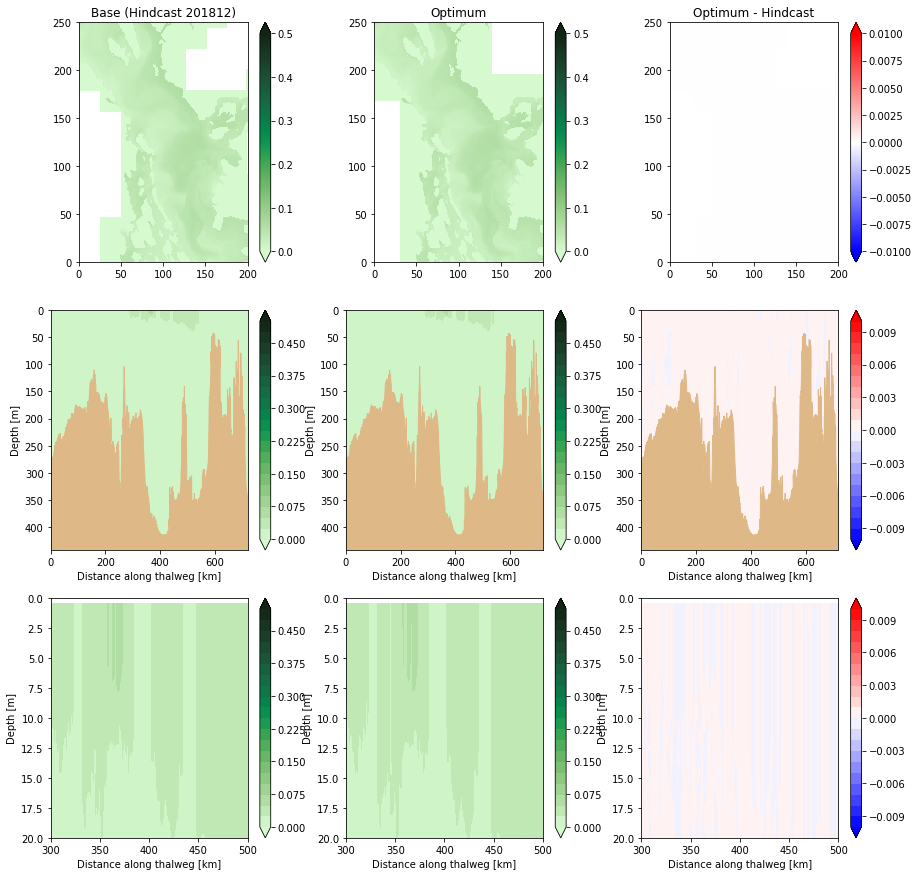

In [15]:
variable, name, cmap = 'ciliates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.5, 0, 0.01)

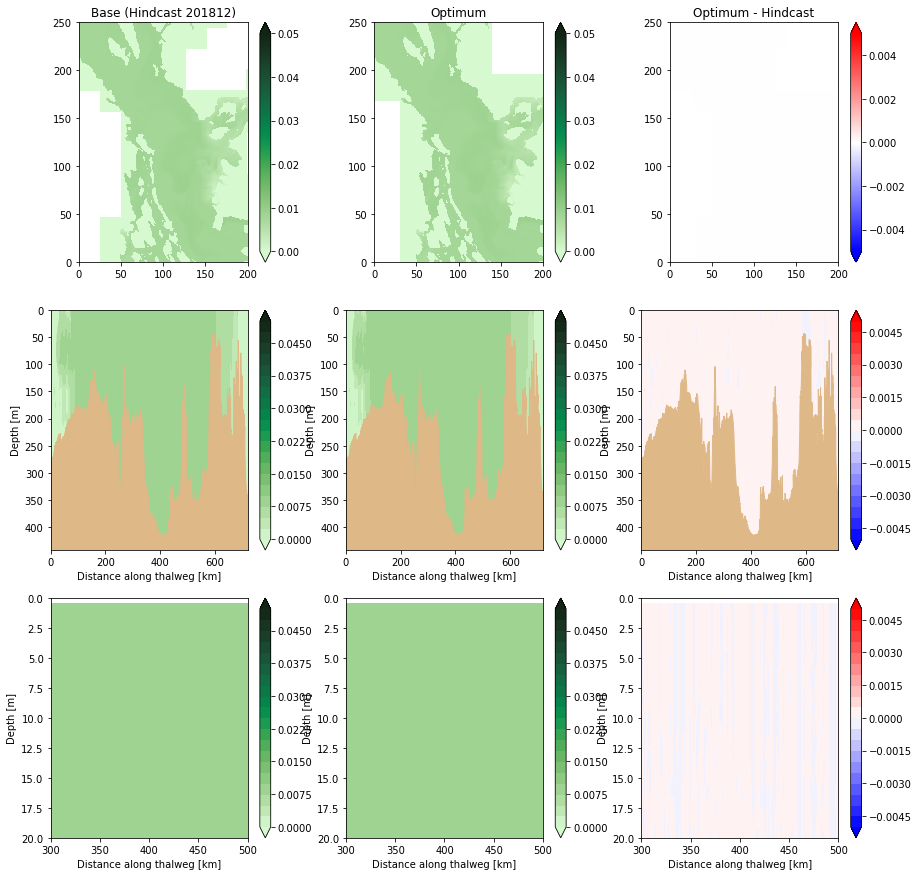

In [16]:
variable, name, cmap = 'microzooplankton', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.05, 0, 0.005)

# Carbon

In [54]:
ng = xr.open_dataset('/results/SalishSea/spinup.201812/21nov14/SalishSea_1h_20141121_20141121_carp_T.nc')
hd = xr.open_dataset('/data/dlatorne/optimum-tests/21nov14-openmpi-16x34/SalishSea_1h_20141121_20141121_carp_T_20141121-20141121.nc')

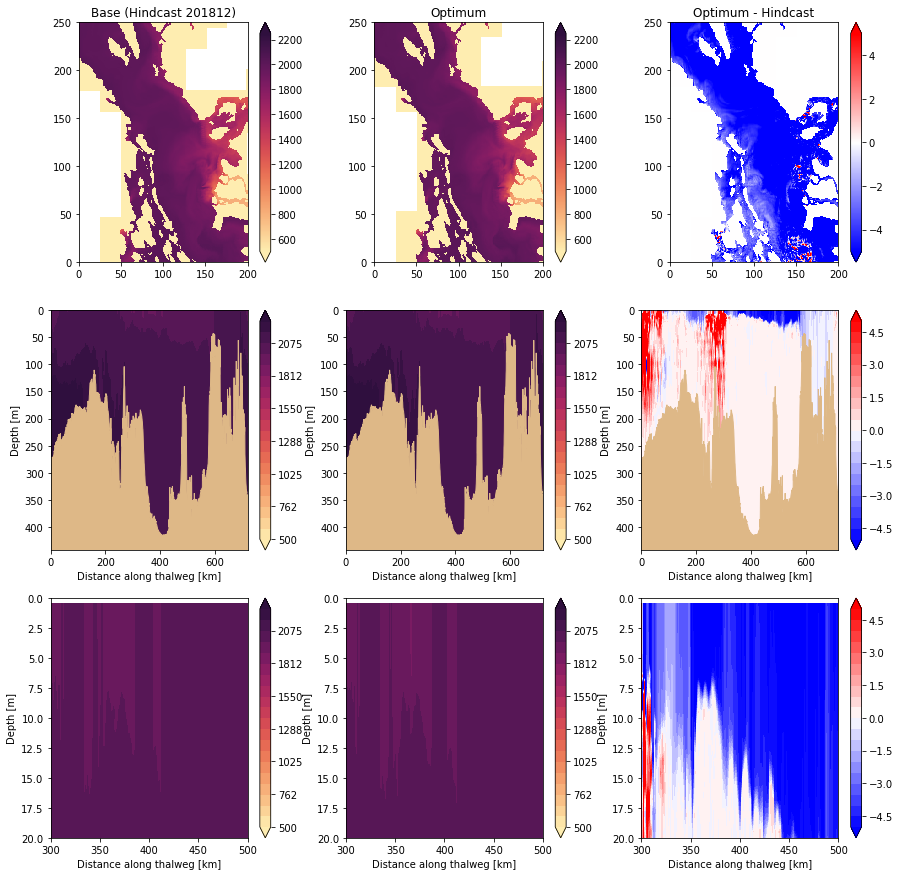

In [55]:
variable, name, cmap = 'dissolved_inorganic_carbon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2250, 500, 5)

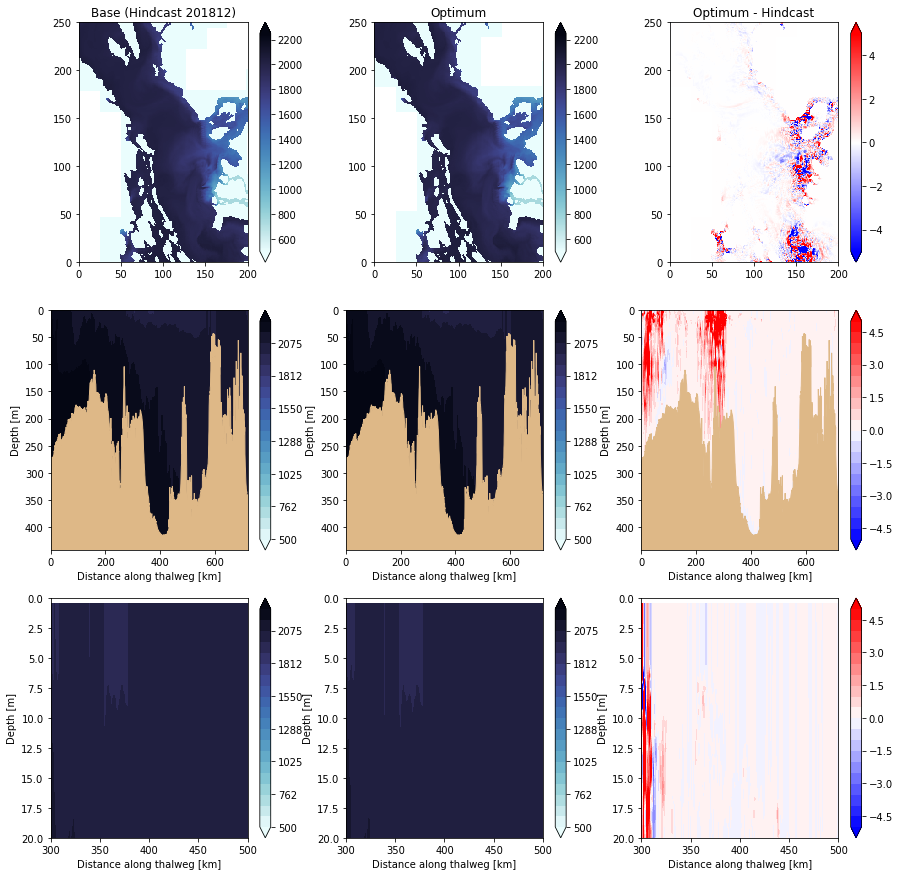

In [56]:
variable, name, cmap = 'total_alkalinity', 10, cm.ice_r
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2250, 500, 5)

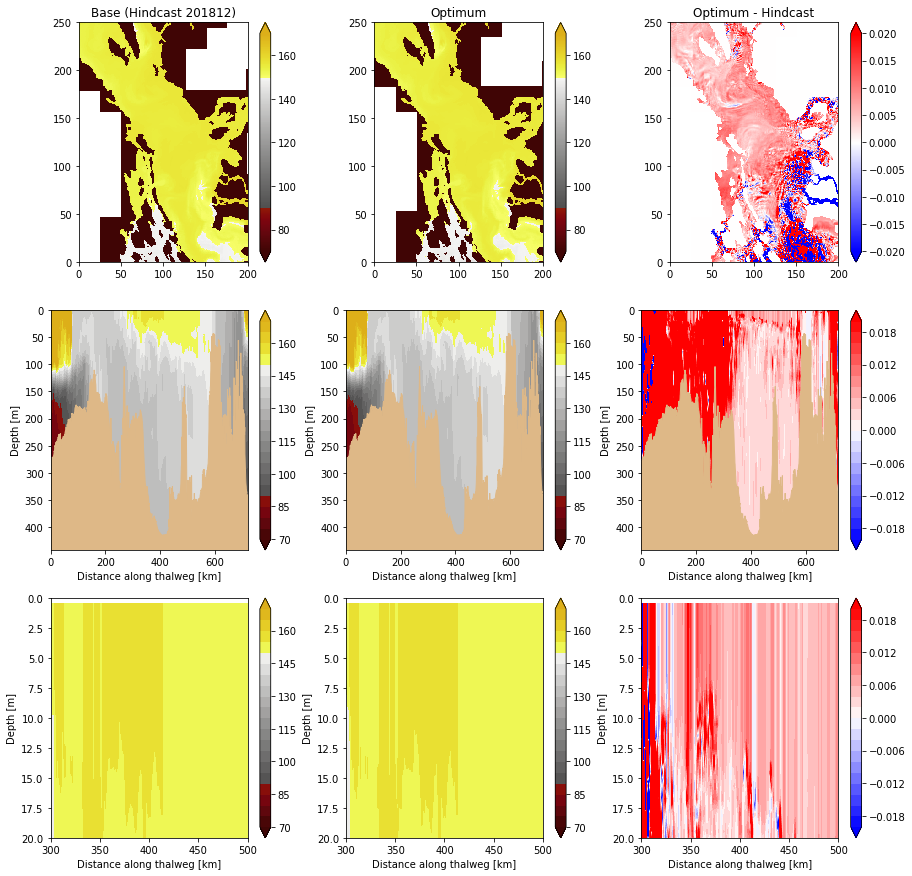

In [57]:
variable, name, cmap = 'dissolved_oxygen', 10, cm.oxy
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 170, 70, 0.02)